In [1]:
import torch
import torchgeometry as tgm

import cv2

In [2]:
# read the image with OpenCV
image = cv2.imread('./data/bruce.png')[..., (2,1,0)]
print(image.shape)

img = tgm.image_to_tensor(image)
img = torch.unsqueeze(img.float(), dim=0)  # BxCxHxW

(372, 600, 3)


In [3]:
# get random 4 points                                  
_, c, h, w = img.shape  # channels, height, width
norm = torch.rand(1, 4, 2)

# the source points are the region to crop corners
points_src = torch.FloatTensor([[
    [125, 150], [562, 40], [562, 282], [54, 328],
]])

# the destiantion points are the image vertexes
h, w = 64, 128  # destination size
points_dst = torch.FloatTensor([[
    [0, 0], [w - 1, 0], [w - 1, h - 1], [0, h - 1],
]])
                                                
# compute perspective transform
M = tgm.get_perspective_transform(points_src, points_dst)

# warp the original image by the found transform
img_warp = tgm.warp_perspective(img, M, dsize=(h, w))

# convert back to numpy
image_warp = tgm.tensor_to_image(img_warp.byte())

# draw points into original image
for i in range(4):
    center = tuple(points_src[0, i].long().numpy())
    image = cv2.circle(image.copy(), center, 5, (0, 255, 0), -1)

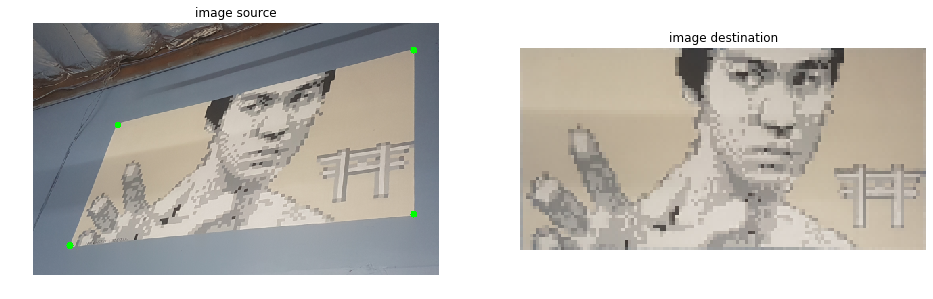

In [4]:
import matplotlib.pyplot as plt 
%matplotlib inline

# create the plot
fig, axs = plt.subplots(1, 2, figsize=(16, 10))
axs = axs.ravel()

axs[0].axis('off')
axs[0].set_title('image source')
axs[0].imshow(image)

axs[1].axis('off')
axs[1].set_title('image destination')
axs[1].imshow(image_warp)